### Student Information
Name:蔡洵晟

Student ID:109065466

GitHub ID:veblen-cai

Kaggle name:veblen97

Kaggle private scoreboard snapshot:

[Snapshot](1.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

# First PART

#### some cell we must run so that we can show my answers of these questions

In [4]:
import pandas as pd

### training data
anger_train = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
import nltk

from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)


from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
# I/O check
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)


# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/Users/chenyeming/Downloads/DM2020-Lab2-Master-main/log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/Users/chenyeming/Downloads/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

/Users/chenyeming/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


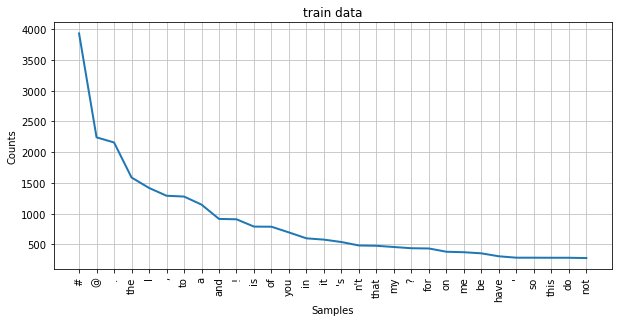

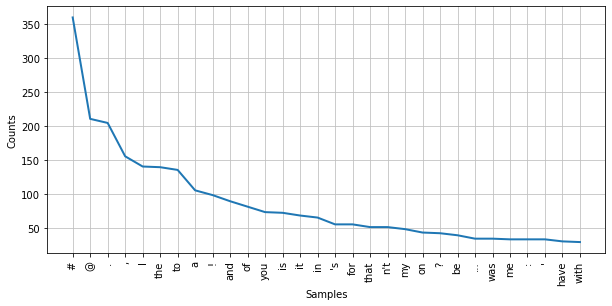

In [6]:
aaaa = list(train_df['text'])
data1 = ' '.join(aaaa)

aaaa = list(test_df['text'])
data2 = ' '.join(aaaa)

# Answer here
import nltk
def graph(data1,data2):
    
    plt.figure(figsize = (10,10))
    plt.subplot(211)
    plt.title('train data')
    tokens = nltk.tokenize.word_tokenize(data1)
    fd = nltk.FreqDist(tokens)
    fd.plot(30,cumulative=False)
    
    plt.figure(figsize = (10,10))
    plt.title('test data')
    plt.subplot(212)
    tokens = nltk.tokenize.word_tokenize(data2)
    fd = nltk.FreqDist(tokens)
    fd.plot(30,cumulative=False)
    
graph(data1,data2)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
# Answer here
#TF-IDF feature
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, max_features=20000, stop_words='english')
# TF-IDF feature matrix
tfidf_vectorizer.fit(train_df['text'])
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

feature_names = tfidf_vectorizer.get_feature_names()
feature_names[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blind',
 'block',
 'blocks',
 'blood',
 'bloody']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here

#the plot above is confusion-matrix. It‘ s clearly shown the prediciton distribution by this model. 
#Specifically, on the diagonal is the correct prediction, and the other positions are the wrong prediction. 
#For example, if we look at the element in one row and two columns, 
#it means the number of true values predicted to anger while it is truly to be fear. 
#The rest and so on.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.79
testing accuracy: 0.69
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.73      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.62      0.61      0.62        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



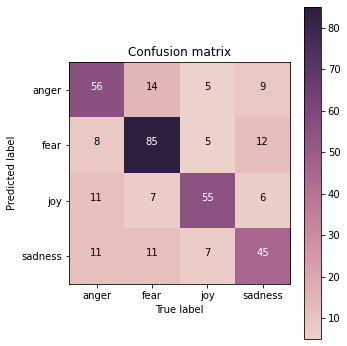

In [9]:
# Answer here

from sklearn.naive_bayes import MultinomialNB

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build Naive Bayes model
MN_model = MultinomialNB()

## training!
MN_model = MN_model.fit(X_train, y_train)

## predict!
y_train_pred = MN_model.predict(X_train)
y_test_pred = MN_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
#1. The decision tree model is undoubtedly over-fitting, 
#because its accuracy on the training set is infinitely close to 1, 
#but in fact it performs generally on the test set. 
#Naive Bayes does not have this problem.

#2. The F1-score of Naive Bayes in the four categories is higher than that of the decision tree model. 
#There is no doubt that the performance of Naive Bayes completely exceeds the decision tree model.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

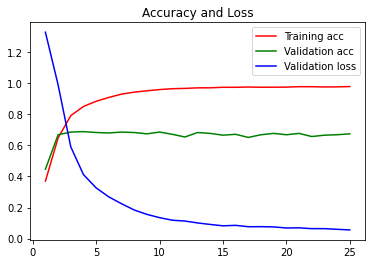

In [10]:
# Answer here
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
 
plt.title('Accuracy and Loss')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'blue', label='Validation loss')

plt.legend()
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here

#1. Accumulation is the easiest way to get sentence vectors

#2. The averaging method is similar to the accumulation method.
#It also needs to add up all the non-stop word vectors in a sentence,
#but at the end, the number of non-stop words needs to be added to the vector.

#3. TF-IDF weighted average method needs to use TF-IDF technology, 
#which is a commonly used text processing technology. 
#The TF-IDF value of a word is directly proportional to the frequency of its appearance in the document, 
#and inversely proportional to the frequency of its appearance in the corpus. 
#TF-IDF is obtained by multiplying TF Term Frequency and IDF Inverse Document Frequency


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
fear_words:  ['fear', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'di

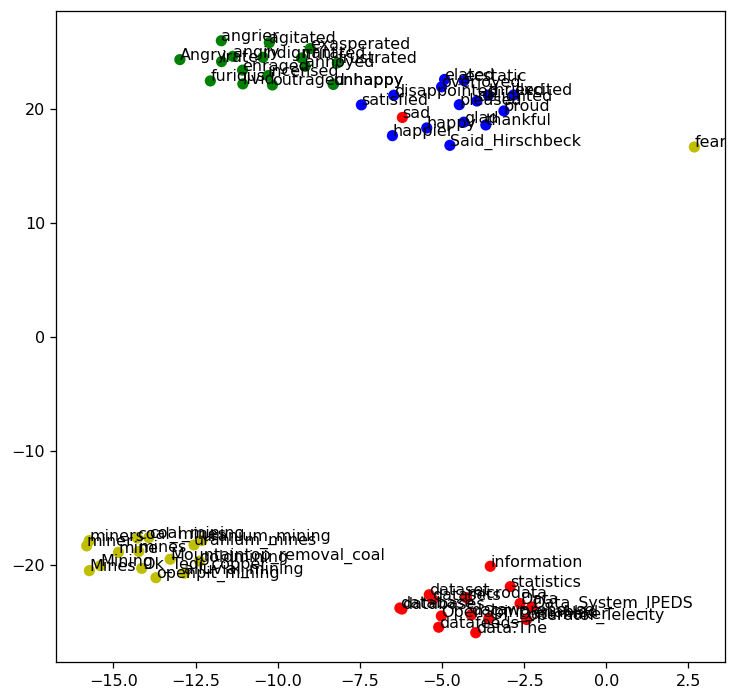

In [11]:
# Answer here

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# SecondPART

In [ ]:
#we will simply make a report about my solution to this question

---
## >>>method 1.0
#### firstly, I consider this question from some basic methods

>**Text classification is an example of supervised learning, which uses a data set containing text documents and labels to train a classifier.**

---

The end-to-end text classification training mainly consists of three parts:

1. Prepare the data set: The first step is to prepare the data set, including loading the data set and performing basic preprocessing, and then dividing the data set into a training set and a validation set.

2. Feature engineering: The second step is feature engineering. The original data set is converted into flat features for training machine learning models, and new features are created from existing data features.

3. Model training: The last step is modeling, using the labeled data set to train the machine learning model.

4. Further improve the performance of the classifier: This article will also discuss different methods to improve the performance of the text classifier.

### 1. Data PreProcessing
**1.1 Delete the twitter handle** 

Tweets contain a lot of twitter handles (@user), which is the way that twitter users recognize on twitter. We will delete all these twitter handles from the data because they can't convey too much information. For convenience, let's combine train and test set first. This saves the trouble of performing the same steps twice on the test and on the train. Then we define a function to delete unnecessary text patterns from tweets. It has two parameters, one is the original string of text, and the other is the text pattern that we want to remove from the string. The function returns the same input string, but without a given pattern. We will use this function to remove the pattern "@user" from all tweets in the data. Finally, create a new column tidy_tweet, which will contain the cleaned and processed tweets. Note that we have passed "@[\w]*" as the pattern to the remove_pattern function. It is actually a regular expression, you can choose any word beginning with "@".

**1.2 Delete punctuation, numbers and special characters**

Punctuation, numbers, and special characters are not very helpful in general text processing. It is better to delete them from the text, just like deleting the twitter handle. Here we will replace everything except characters and tags with spaces.

**1.3 Delete short words**

Delete all words that are 3 or shorter in length. For example, words like "um" and "oh".

**1.4 Stemming**

Stemming is a rule-based process of stripping suffixes ("ing", "ly", "es", "s", etc.) from a word. For example, "play", "player", "playing", "play" and "playing" are different variants of the word "play".
Next, we divide the data set into a training set and a validation set so that we can train and test the classifier. In addition, we will encode our target column so that it can be used in the machine learning model:

some core code is shown below:

```
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt  
#remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*")

#remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()
```

----

### 2. Feature Engineering


Next is feature engineering. In this step, the original data will be converted into feature vectors, and new features will also be created based on the existing data. In order to select important features from the data set, there are several ways:

* Count vector as feature
* TF-IDF vector as a feature
* Single word level
* Multiple word levels (N-Gram)
* Part of speech
* Word embedding as a feature
* Text-based/NLP features
* Topic model as a feature

**2.1 Counting vector as a feature**

The count vector is a matrix representation of the data set, where each row represents a document from the corpus, each column represents a term from the corpus, and each cell represents the frequency count of a specific term in a specific document:

**2.2 TF-IDF vector as a feature**

The TF-IDF score represents the relative importance of words in the document and the entire corpus. The TF-IDF score consists of two parts: the first part is to calculate the standard term frequency (TF), and the second part is the inverse document frequency (IDF). Among them, calculating the total number of documents in the corpus divided by the number of documents containing the word, and then taking the logarithm is the inverse document frequency.

some code is shown as below:

```
#Bag-of-Words Features
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.5, min_df=5, max_features=20000, stop_words='english')
#bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

#TF-IDF feature
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, max_features=20000, stop_words='english')
#TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
```

---

### 3.Modeling

The final step of the text classification framework is to train a classifier using the previously created features. Regarding this final model, there are many models to choose from in machine learning. We will use the following different classifiers for text classification:



* Naive Bayes Classifier
* Linear classifier
* Support Vector Machine (SVM)
* Bagging Models

* Deep neural network
* Convolutional Neural Network (CNN)
* LSTM
* Recurrent Convolutional Neural Network (RCNN)

Next, we introduce and use these models in detail. The following function is a general function of the training model. Its input is the classifier, the feature vector of the training data, the label of the training data, and the feature vector of the verification data. We use these inputs to train a model and calculate the accuracy.

***After many times adjusting our parameters, we find the NB is the best between the above several models.***

Using the sklearn framework, the naive Bayes model is implemented under different features. I found that the BOW feature has good results. The related code is shown below.

```

train_bow = bow[:len(data_train),:]
test_bow = bow[len(data_train):,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data_train['label'], random_state=42, test_size=0.3)

clf = MultinomialNB()
clf.fit(xtrain_bow, ytrain) # training the model

prediction = clf.predict(xvalid_bow) # predicting on the validation set
#prediction_int = np.argmax(prediction,1)

f1_score(yvalid, prediction,average = 'macro') # calculating f1 score

```

Naive Bayes is a classification technique based on Bayes' theorem and assumes that the predictors are independent. The Naive Bayes classifier assumes that a particular feature in a category has no relationship with other existing features.

---
#### > Shown below is the code with the best results we can run directly
#### the results is 4.1+

In [12]:
import pandas as pd
import json
import numpy as np
from io import StringIO

#in this part, we read the data and make some merge

data_id = pd.read_csv('/Users/chenyeming/Downloads/dm2020-hw2-nthu/data_identification.csv')
emotion = pd.read_csv('/Users/chenyeming/Downloads/dm2020-hw2-nthu/emotion.csv')
sample = pd.read_csv('/Users/chenyeming/Downloads/dm2020-hw2-nthu/sampleSubmission.csv')

tweets = []
for line in open('/Users/chenyeming/Downloads/dm2020-hw2-nthu/tweets_DM.json', 'r'):
    tweets.append(json.loads(line))
    
tweet_code = list(map(lambda x : x['_source']['tweet']['tweet_id'],tweets))
tweet_content = list(map(lambda x : x['_source']['tweet']['text'],tweets))

data = pd.DataFrame()
data['tweet_id'] = tweet_code
data['text'] = tweet_content

data2 = pd.merge(data,data_id)
data3 = pd.merge(data2,emotion,'left')
df1 = data3.loc[data3.isnull().any(axis=1)]
#df1.to_csv('we_will_predict.csv',index = False)
data_train = data3.loc[~data3.isnull().any(axis=1)]
#data_train.to_csv('we_train.csv',index = False)

In [13]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np 

combi = data_train.append(df1, ignore_index=True)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt  
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*")

# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [15]:
#Bag-of-Words Features
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.5, min_df=5, max_features=20000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

#TF-IDF feature
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, max_features=20000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [16]:
data_train['label'] = data_train['emotion'].factorize()[0]

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


train_bow = bow[:len(data_train),:]
test_bow = bow[len(data_train):,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data_train['label'], random_state=42, test_size=0.3)

#clf = RandomForestClassifier()
#clf = LogisticRegression()
clf = MultinomialNB()
clf.fit(xtrain_bow, ytrain) # training the model

prediction = clf.predict(xvalid_bow) # predicting on the validation set
#prediction_int = np.argmax(prediction,1)

f1_score(yvalid, prediction,average = 'macro') # calculating f1 score

0.4156483505034605

---
## >>>method 2.0
#### secondly, I consider this question from some modern thoughts

>What is BERT
    BERT is a pre-trained language representation method. A general "language understanding" model is trained on a large amount of text corpus (Wikipedia), and then this model is used to perform the desired NLP task. BERT performs better than the previous method because it is the first unsupervised, deep two-way system used in pre-training NLP.
    Unsupervised means that BERT only needs to be trained with plain text corpus. This is very important, because a large amount of text corpus can be publicly available on the Internet in various languages.

    The pre-training representation can be context-independent or context-sensitive, and the context-sensitive representation can be unidirectional or bidirectional. Context-free models such as word2vec or GloVe can generate a separate "word vector" representation for each word in the vocabulary, so the word "bank" is used in "bank deposit" (bank) and "river bank" (shore). The representation is the same. The context-sensitive model generates a representation of each word based on other words in the sentence.

    BERT is built on recent pre-training related representation work-Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, and ULMFit-but the key is that these models are one-way or shallow two-way. This means that each word is related to the word on its left or right. For example, in the sentence "I made an bank deposit", the one-way representation of "bank" is based only on "I made a" without "deposit". Some previous work also combined separate left and right contexts, but only in a simple way. BERT uses both the left and right content to mean "bank"-"I made a… deposit"-starting from a very low-level deep network, so it is deeply bidirectional (deep bidirectional).

    BERT uses a simple method: we mask 15% of the input words, run the entire sequence through a deep two-way transformer Encoder, and then only predict the masked words.

## 1. Download related settings

**1.1 Download the code from git**

the link is [bert-git](https://github.com/google-research/bert)

**1.2 download the English pre-trained model**

the link is [bert-pre_trained model](https://storage.googleapis.com/bert_models/2020_02_20/all_bert_models.zip)

**1.3change the dataset to specific types.**

we must change our data to the following format

label||text         
--|:--:|--:
anticipation|People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>
sadness	|As we see, Trump is dangerous to #freepress around the world. What ISSA is stalking Tasha<LH>
joy|@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH>good!!
anticipation|Still waiting on those supplies Liscus. <LH>
--|:--:|--:
    
    
## 2. Modify the git data 
##### ——Modify run_classifier.py

**Overload the DataProcessor class and rewrite the DataProcessor class according to the format of my file**

the code is shown below
```
class MyTaskProcessor(DataProcessor):
  """Processor for my task-news classification """
  def __init__(self):
    self.labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'trust']

  def get_train_examples(self, data_dir):
    return self._create_examples(
      self._read_tsv(os.path.join(data_dir, 'tweet_train.txt')), 'train')

  def get_dev_examples(self, data_dir):
    return self._create_examples(
      self._read_tsv(os.path.join(data_dir, 'tweet_valid.txt')), 'val')

  def get_test_examples(self, data_dir):
    return self._create_examples(
      self._read_tsv(os.path.join(data_dir, 'tweet_test.txt')), 'test')

  def get_labels(self):
    return self.labels

  def _create_examples(self, lines, set_type):
    """create examples for the training and val sets"""
    examples = []
    for (i, line) in enumerate(lines):
      guid = '%s-%s' %(set_type, i)
      text_a = tokenization.convert_to_unicode(line[1])
      label = tokenization.convert_to_unicode(line[0])
      examples.append(InputExample(guid=guid, text_a=text_a, label=label))
    return examples

```
**and don' t forget to change some code in the main function**

```
def main(_):
  tf.logging.set_verbosity(tf.logging.INFO)

  processors = {
      "cola": ColaProcessor,
      "mnli": MnliProcessor,
      "mrpc": MrpcProcessor,
      "xnli": XnliProcessor,
      "mytask": MyTaskProcessor,
  }
```

## 3. Evaluation
    
***What we can come to conclusion is that BERT is definitely the powerful weapon in NLP. We got an amazing score: 0.51+***